In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv('/content/Zoo.csv')
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


**1. Analyse the data using the visualizations**

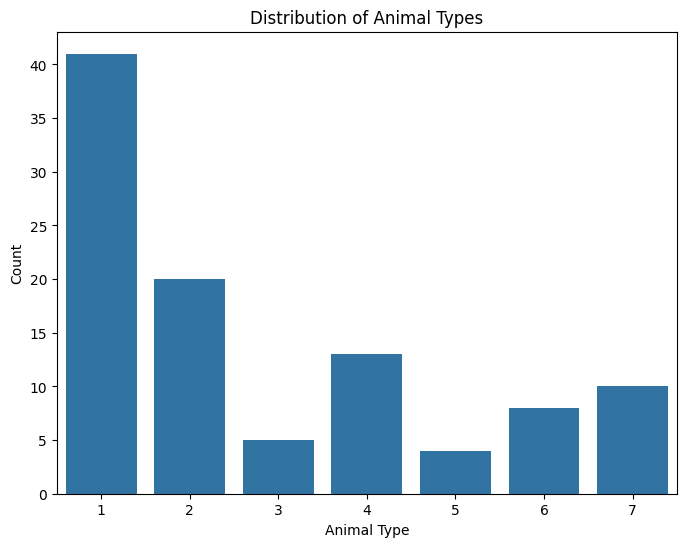

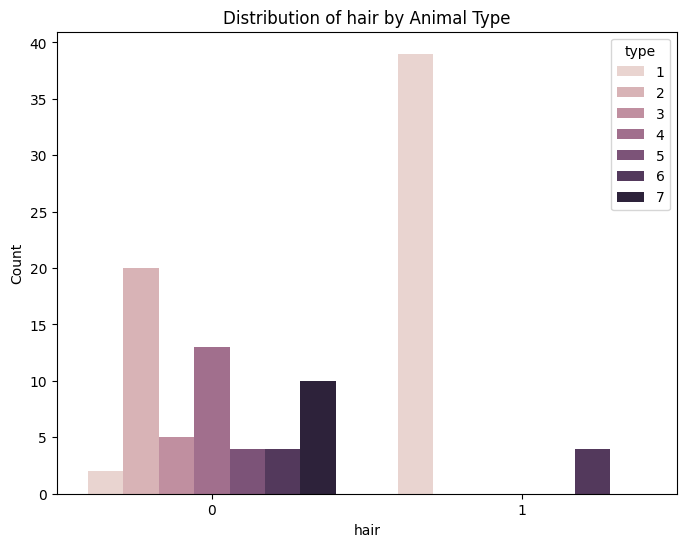

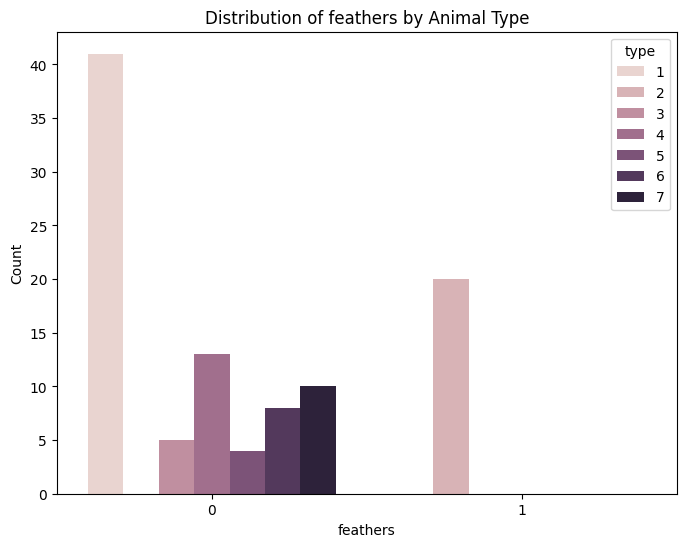

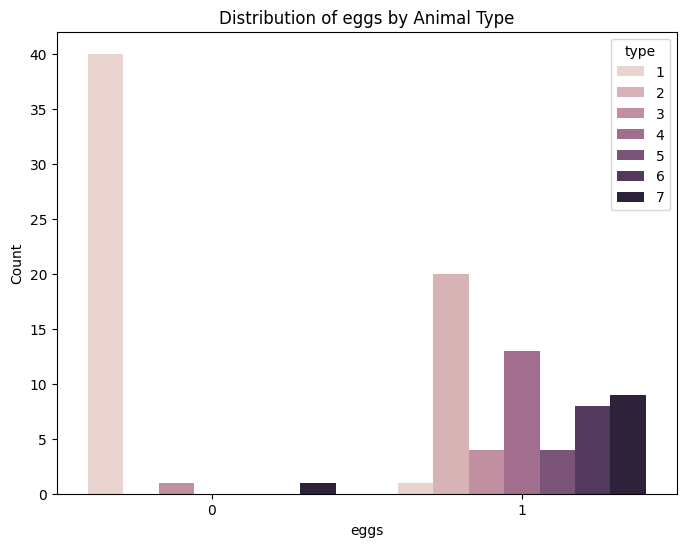

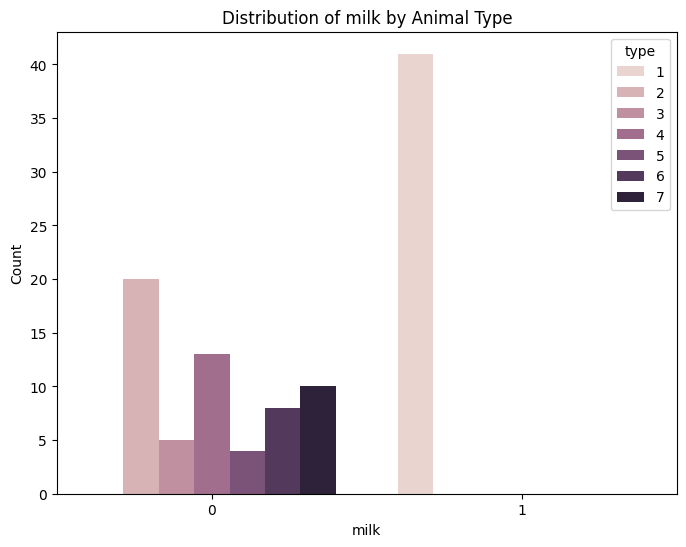

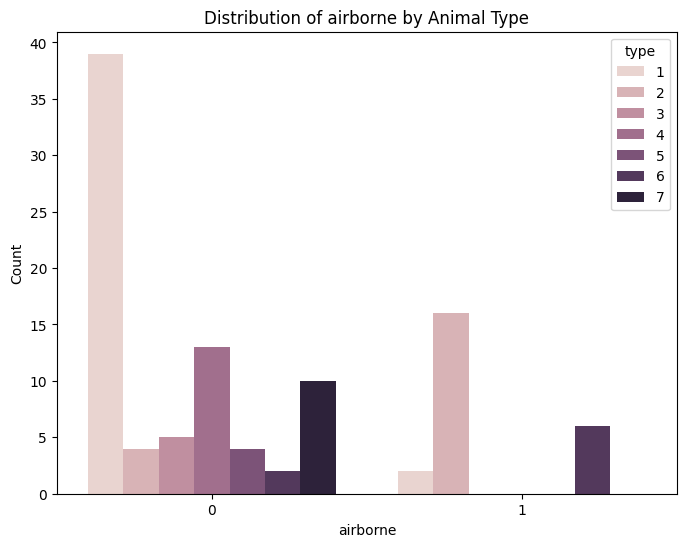

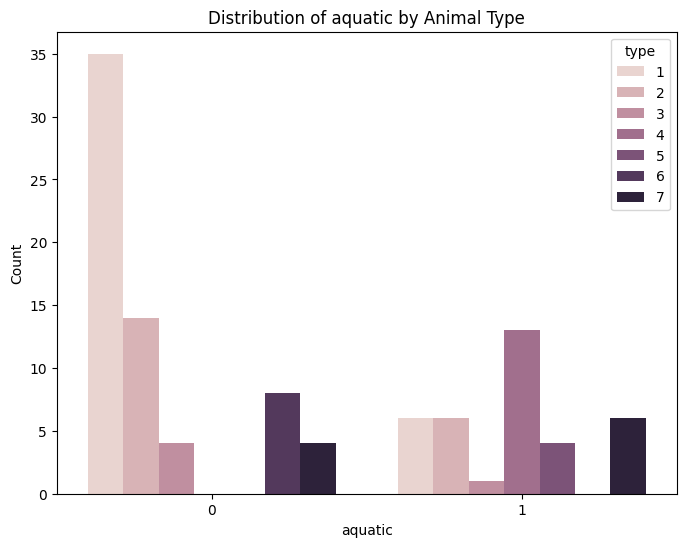

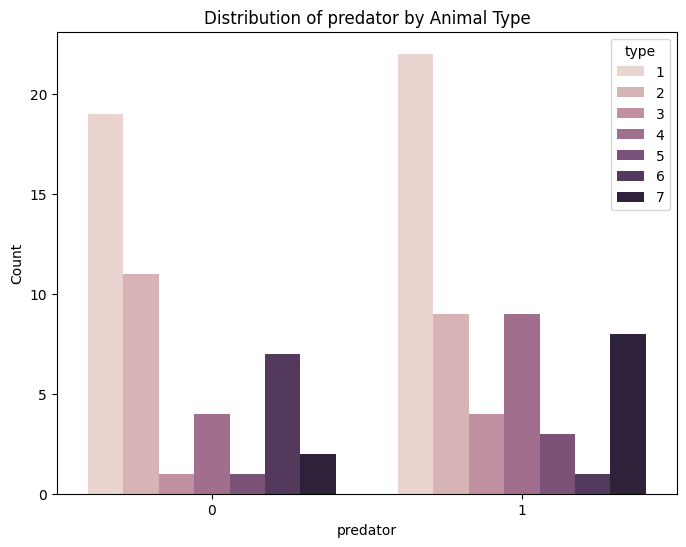

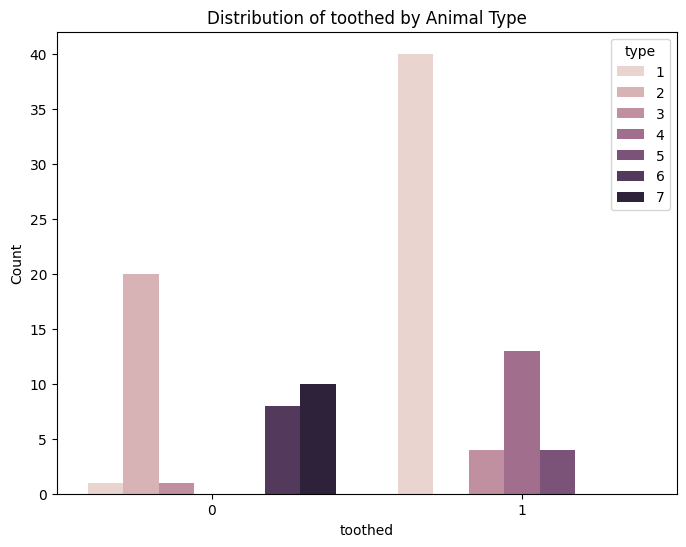

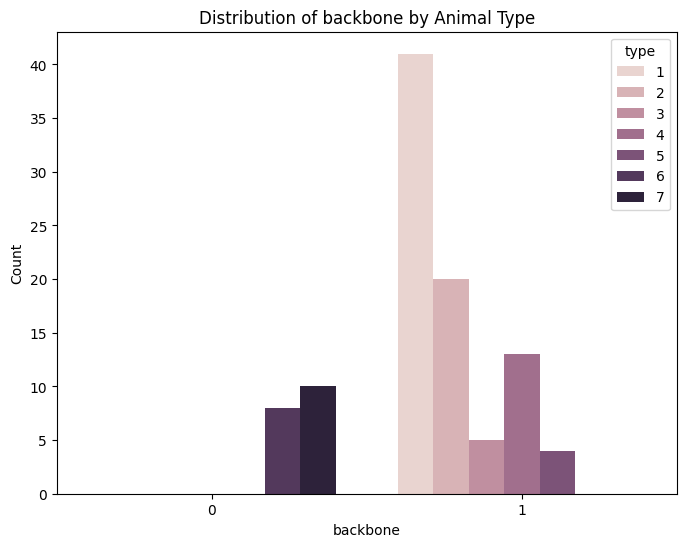

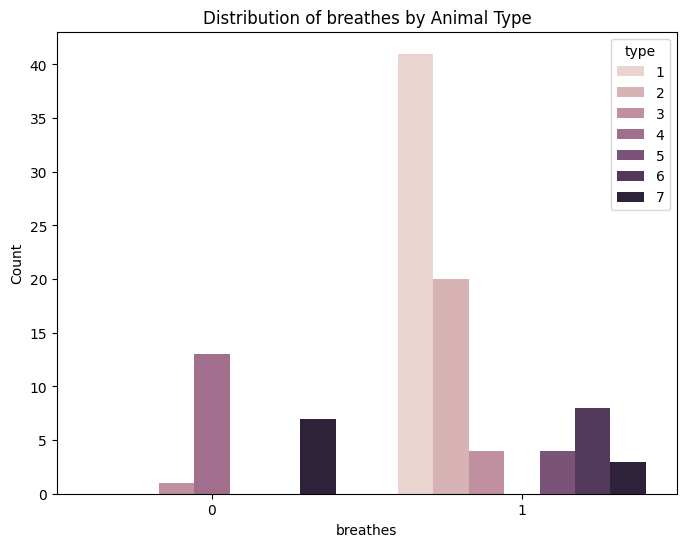

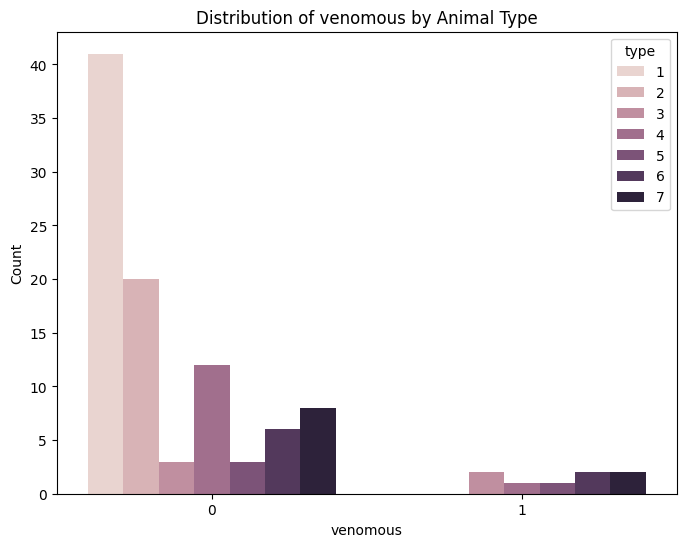

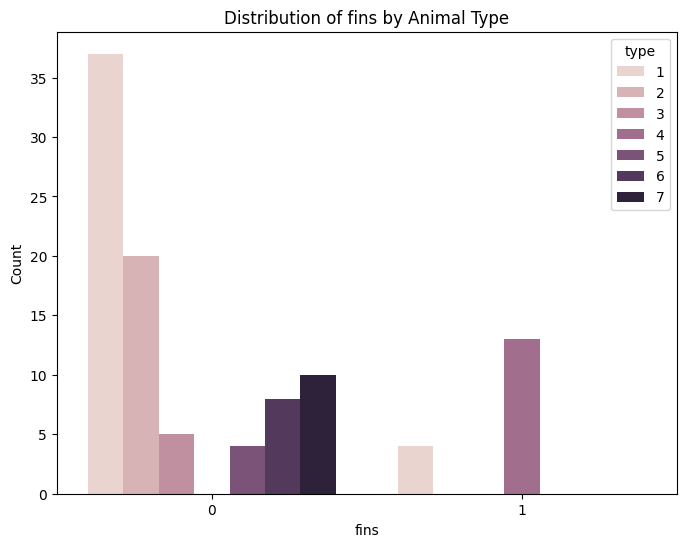

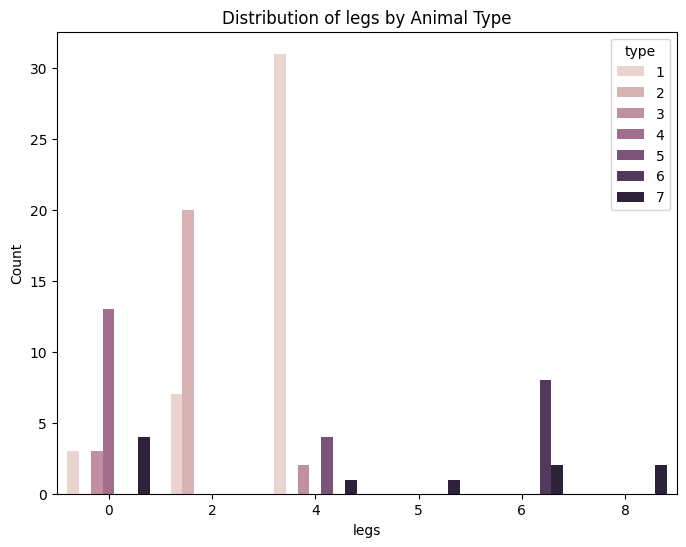

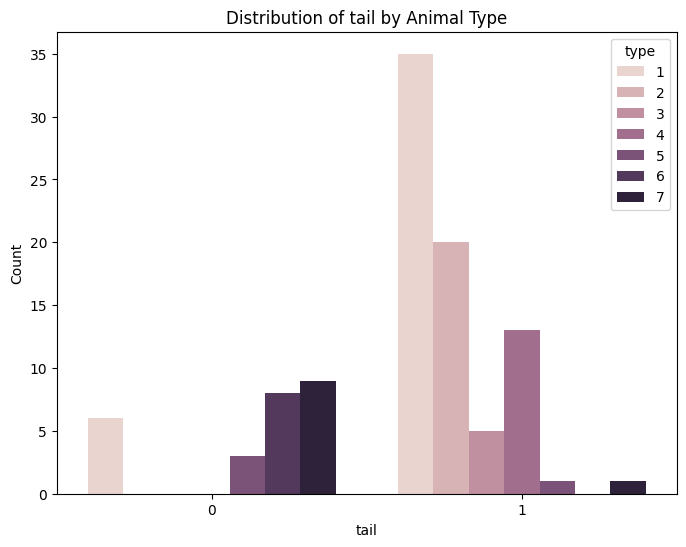

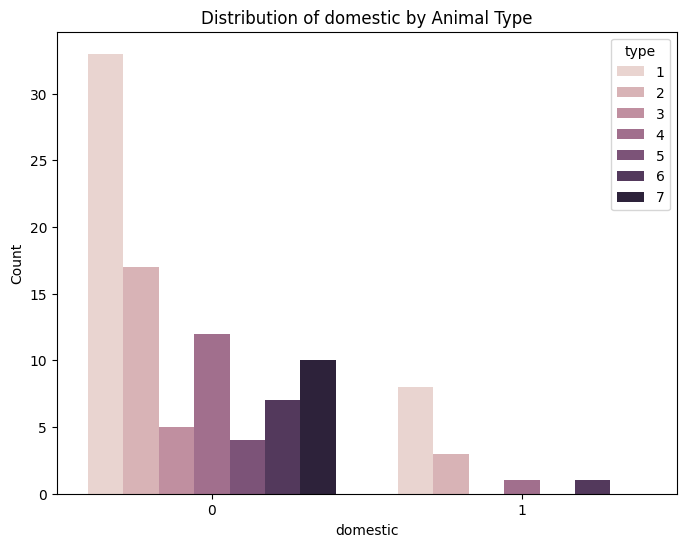

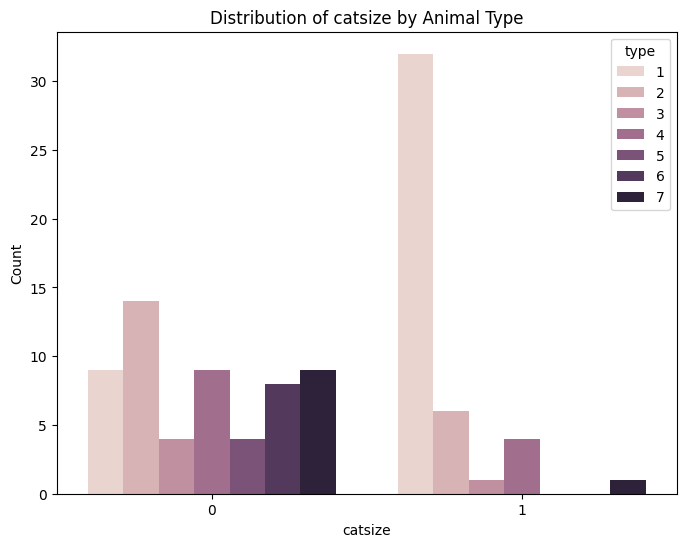

In [4]:
# Analyze the distribution of animal types
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df)
plt.title('Distribution of Animal Types')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.show()

# Analyze the relationship between selected features and animal type
features = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue='type', data=df)
    plt.title(f'Distribution of {feature} by Animal Type')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

**2. Preprocess the data by handling missing values & Outliers, if any.**

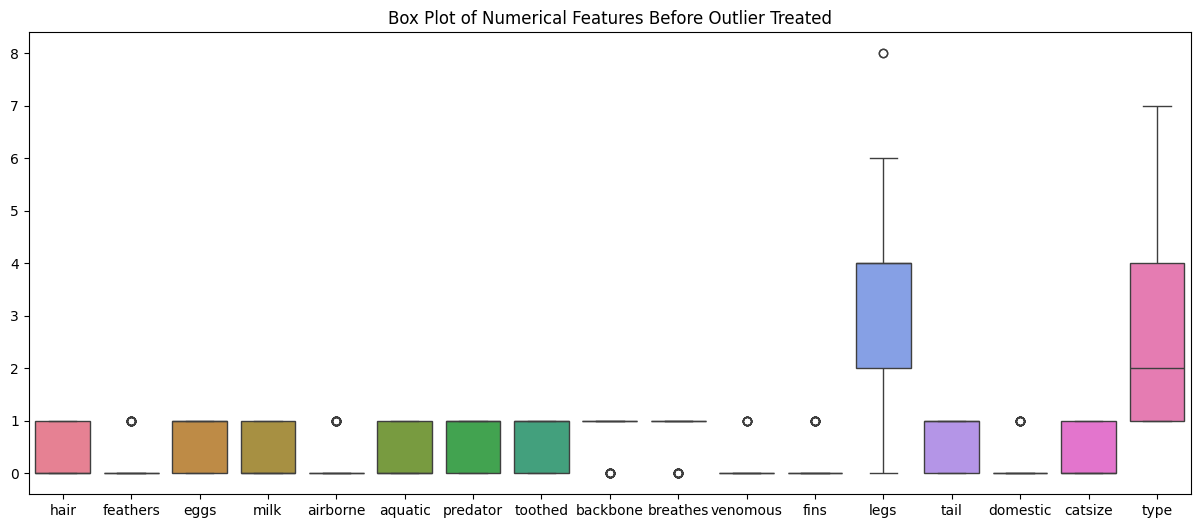

In [5]:
plt.figure(figsize=(15, 6))
sns.boxplot(df)
plt.title('Box Plot of Numerical Features Before Outlier Treated')
plt.show()

In [6]:
# Outlier Treatment using IQR Method
for col in df.columns:
  if df[col].dtype != 'object':
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    IQR=q3-q1
    upper_bound=q3+1.5*IQR
    lower_bound=q1-1.5*IQR
    df[col]=np.where(df[col]>upper_bound,upper_bound,df[col])
    df[col]=np.where(df[col]<lower_bound,lower_bound,df[col])
print("Outlier Treated")

Outlier Treated


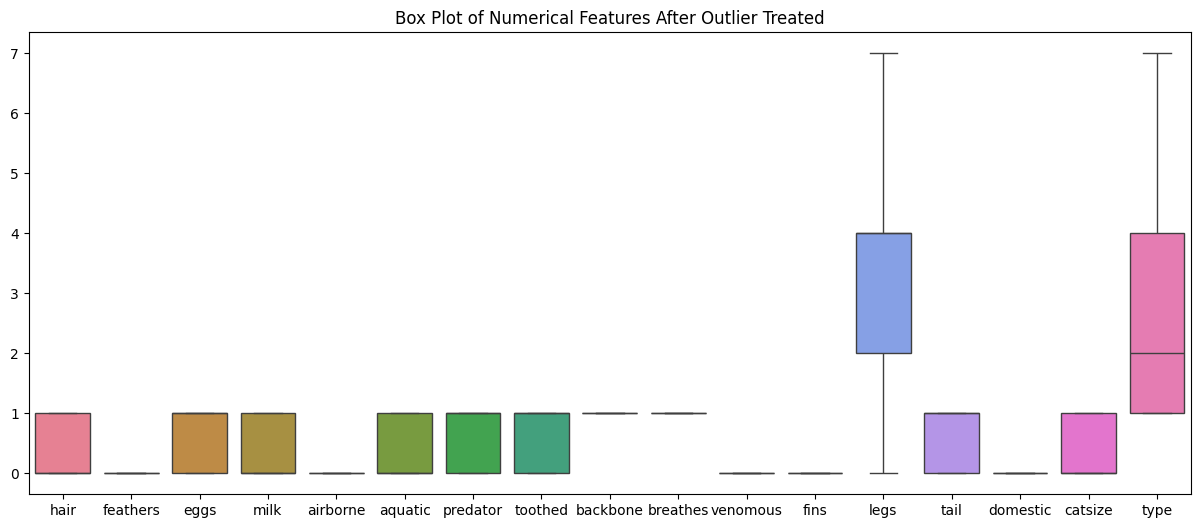

In [7]:
# After outlier treated
plt.figure(figsize=(15, 6))
sns.boxplot(df)
plt.title('Box Plot of Numerical Features After Outlier Treated')
plt.show()

In [8]:
df.isnull().sum()

,0
animal name,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0


**3. Split the dataset into training and testing sets (80% training, 20% testing).**

In [9]:
# Seperate X and Y
x=df.drop(['animal name','type'],axis=1)
x

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,1.0
97,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,6.0,0.0,0.0,0.0
98,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0
99,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
y=df['type'].astype('int')
y

,type
0,1
1,1
2,4
3,1
4,1
...,...
96,1
97,6
98,1
99,7


In [11]:
# Split the data in Training and Testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset**

In [12]:
# Train the model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
knn.score(x_test, y_test)*100

95.23809523809523

In [13]:
# To check the overfitting model
knn.score(x_train, y_train)*100

97.5

**5. Choose an appropriate distance metric and value for K.**

In [14]:
# We create a loop to reduce overfitting
for i in range(1,30):
  knn1=KNeighborsClassifier(n_neighbors=i)
  knn1.fit(x_train,y_train)
  print(i,knn1.score(x_train,y_train)*100,knn1.score(x_test,y_test)*100)

1 100.0 95.23809523809523
2 97.5 95.23809523809523
3 97.5 95.23809523809523
4 97.5 90.47619047619048
5 91.25 85.71428571428571
6 91.25 85.71428571428571
7 90.0 85.71428571428571
8 82.5 85.71428571428571
9 83.75 85.71428571428571
10 82.5 85.71428571428571
11 83.75 85.71428571428571
12 78.75 85.71428571428571
13 78.75 80.95238095238095
14 73.75 71.42857142857143
15 73.75 71.42857142857143
16 75.0 71.42857142857143
17 75.0 71.42857142857143
18 75.0 71.42857142857143
19 75.0 71.42857142857143
20 73.75 71.42857142857143
21 73.75 71.42857142857143
22 73.75 71.42857142857143
23 70.0 71.42857142857143
24 70.0 71.42857142857143
25 70.0 71.42857142857143
26 70.0 71.42857142857143
27 70.0 71.42857142857143
28 70.0 71.42857142857143
29 56.25 61.904761904761905


In [15]:
knn.predict([[0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([7])

**6. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.**

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = knn.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9524
Precision: 0.9206
Recall: 0.9524
F1-score: 0.9333


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**7. Visualize the decision boundaries of the classifier.**

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


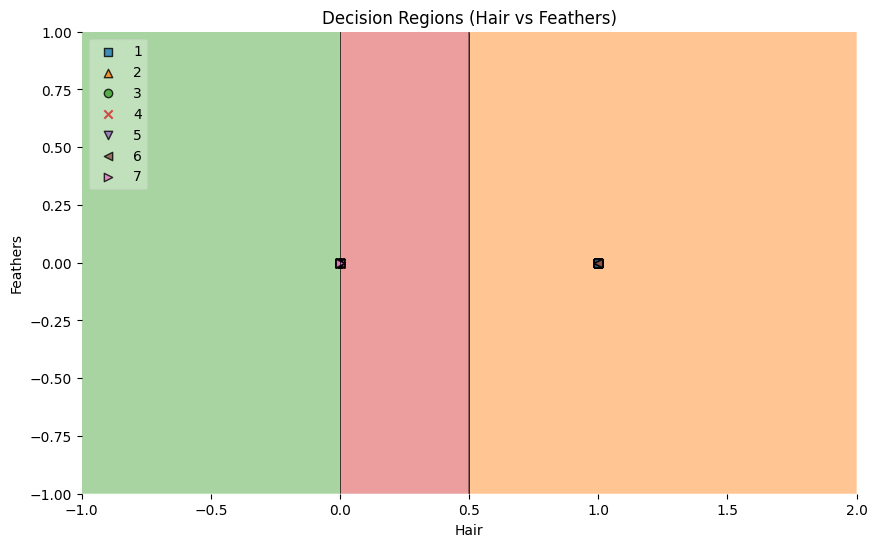

In [17]:
# Plot Decision Region
from mlxtend.plotting import plot_decision_regions
from sklearn.neighbors import KNeighborsClassifier

# Select two features for plotting (e.g., 'hair' and 'feathers')
X_plot = x[['hair', 'feathers']]

# Create filler values for the remaining features using the mean
filler_values = {}
for col in x.columns:
    if col not in ['hair', 'feathers']:
        filler_values[x.columns.get_loc(col)] = x[col].mean()

# Train a new KNN classifier with only the selected two features
knn_plot = KNeighborsClassifier(n_neighbors=5) # Using the same n_neighbors as the original model
knn_plot.fit(X_plot, y)

plt.figure(figsize=(10, 6))
plot_decision_regions(X_plot.to_numpy(), y.to_numpy(), clf=knn_plot, filler_feature_values=filler_values, legend=2)
plt.xlabel('Hair')
plt.ylabel('Feathers')
plt.title('Decision Regions (Hair vs Feathers)')
plt.show()

# **Interview Questions**

**1. What are the key hyperparameters in KNN?**

Ans:- The key hyperparameters in KNN are:

**1) n_neighbors (k)**: This is the most important hyperparameter. It determines the number of nearest neighbors to consider when making a prediction. Choosing an appropriate value for 'k' is crucial and can significantly impact the model's performance. A small 'k' can lead to a more sensitive model (prone to noise), while a large 'k' can smooth out the decision boundaries but might lose some local patterns.

**2) weights**: This parameter determines how the contribution of each neighbor is weighted when making a prediction.
* 'uniform': All neighbors have equal weight.
* 'distance': Neighbors are weighted by the inverse of their distance. Closer neighbors have a greater influence.

**3) metric**: This parameter specifies the distance metric used to calculate the distance between data points. Common choices include:
* 'euclidean' (default)
* 'manhattan'
* 'minkowski' (with a parameter 'p' for the power)

**4) p**: This parameter is used with the 'minkowski' metric and represents the power of the Minkowski distance. When p=1, it's equivalent to Manhattan distance, and when p=2, it's equivalent to Euclidean distance.

**2. What distance metrics can be used in KNN?**

Ans:- Some common distance metrics that can be used in KNN include:

**1) Euclidean distance**: This is the most common metric and is the straight-line distance between two points in Euclidean space. It is calculated as the square root of the sum of the squared differences between the corresponding coordinates.

**2) Manhattan distance (or City Block distance)**: This metric calculates the distance between two points by summing the absolute differences of their coordinates. It's like navigating a city grid where you can only move along blocks, not diagonally.

**3) Minkowski distance**: This is a generalized metric that includes both Euclidean and Manhattan distance as special cases. It is defined by a parameter 'p'. When p=1, it's Manhattan distance, and when p=2, it's Euclidean distance.

**4) Chebyshev distance**: This metric is the maximum absolute difference between the corresponding coordinates of two points. It's like moving between two points on a chessboard.

**5) Hamming distance**: This metric is used for binary data and calculates the number of positions at which the corresponding bits are different.